<a href="https://colab.research.google.com/github/mAbbaspour/Hyperparameter-Optimization/blob/main/op%20%26%20asha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import numpy as np
import math;

In [5]:
from google.colab import files
uploaded = files.upload()
uploaded2 = files.upload()


Saving lipo(Lables).csv to lipo(Lables) (1).csv


Saving lipo_global_cdf_rdkit.csv to lipo_global_cdf_rdkit (1).csv


In [122]:
import random
random.seed(1)
import pandas as pd
import io
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [123]:
data = pd.read_csv(io.BytesIO(uploaded2['lipo_global_cdf_rdkit.csv']))
dataY = pd.read_csv(io.BytesIO(uploaded['lipo(Lables).csv']))
print(data[data.isnull().any(axis=1)])

      ('RDKit2DNormalized_calculated', <class 'bool'>)  \
1561                                              True   

      ('BalabanJ', <class 'numpy.float64'>)  \
1561                                  0.895   

      ('BertzCT', <class 'numpy.float64'>)  ('Chi0', <class 'numpy.float64'>)  \
1561                              0.230752                           0.031331   

      ('Chi0n', <class 'numpy.float64'>)  ('Chi0v', <class 'numpy.float64'>)  \
1561                            0.032387                            0.061726   

      ('Chi1', <class 'numpy.float64'>)  ('Chi1n', <class 'numpy.float64'>)  \
1561                           0.050799                            0.045963   

      ('Chi1v', <class 'numpy.float64'>)  ('Chi2n', <class 'numpy.float64'>)  \
1561                            0.116251                             0.04344   

      ...  ('fr_sulfonamd', <class 'numpy.float64'>)  \
1561  ...                               1.593061e-17   

      ('fr_sulfone', <class 'nu

In [124]:
data = data.drop(1561)
dataY = dataY.drop(1561)


In [136]:
arrayY = dataY.values
Y = arrayY[0: ,1 ]
array = data.values
X = array[0:,1:]

In [137]:
X_train, X_test ,Y_train , Y_test  = train_test_split(X, Y ,test_size=0.2)
scaler_data  = preprocessing.MinMaxScaler()
X_train = scaler_data.fit_transform(X_train)
X_test =  scaler_data.transform(X_test)
scaler_labels = preprocessing.MinMaxScaler()
Y_train = scaler_labels.fit_transform(Y_train.reshape(-1, 1))
Y_test = scaler_labels.transform(Y_test.reshape(-1, 1))


[1.91469289e-01 7.17156455e-02 5.99772217e-02 5.26051905e-02
 4.55194466e-02 4.22033688e-02 3.37503243e-02 3.11552003e-02
 2.70041088e-02 2.53137218e-02 2.16206114e-02 2.10871540e-02
 1.84551820e-02 1.71701151e-02 1.56922234e-02 1.50392208e-02
 1.42036073e-02 1.35729685e-02 1.30203144e-02 1.23694546e-02
 1.19638614e-02 1.05452118e-02 9.62462384e-03 9.16715783e-03
 8.74697280e-03 8.42845987e-03 8.14019250e-03 7.76943719e-03
 7.23170023e-03 6.82049307e-03 6.49803018e-03 6.27989646e-03
 5.98914199e-03 5.60962020e-03 5.47534776e-03 5.08836124e-03
 4.98165336e-03 4.89200246e-03 4.52168559e-03 4.46156775e-03
 4.37529309e-03 4.19825590e-03 3.96795298e-03 3.86132998e-03
 3.74205011e-03 3.57677632e-03 3.33977560e-03 3.29475221e-03
 3.18883840e-03 3.04460711e-03 2.96936492e-03 2.88661576e-03
 2.80171422e-03 2.75551415e-03 2.72591101e-03 2.58468670e-03
 2.40375576e-03 2.31052701e-03 2.23426996e-03 2.16090306e-03
 2.03754948e-03 1.95105986e-03 1.92152518e-03 1.86181662e-03
 1.85518813e-03 1.754667

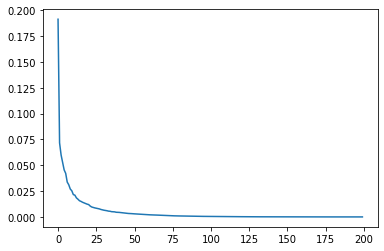

In [138]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=200)
pca.fit(X_train)
print(pca.explained_variance_ratio_)
plt.plot(np.arange(200),pca.explained_variance_ratio_)
plt.show()

In [139]:
pca = PCA(n_components=75)
pca.fit(X_train)
X_train=pca.transform(X_train)



X_test = pca.transform(X_test)


In [140]:
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

(840, 75)
(840, 1)
(3359, 75)
(3359, 1)


In [141]:
Y_train_new =  Y_train.astype(np.float)
Y_test_new = Y_test.astype(np.float)
print(Y_train_new.shape)
print(Y_test_new.shape)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
tensor_x_train = torch.tensor(X_train, dtype=torch.float).to(device) 
tensor_x_test = torch.tensor(X_test, dtype=torch.float).to(device) 

tensor_y_train = torch.tensor(Y_train_new , dtype=torch.float).to(device)
tensor_y_test= torch.tensor(Y_test_new, dtype=torch.float).to(device)


(3359, 1)
(840, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [142]:
from torch.utils.data import TensorDataset
trainset = TensorDataset(tensor_x_train, tensor_y_train) 
testset = TensorDataset(tensor_x_test,tensor_y_test)

In [143]:
%%capture
try:
    import ray
except:
    !pip install -U ray
    import ray

In [144]:
from functools import partial
import numpy as np
import os
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split
from torchsummary import summary

from ray import tune
# a = {"a":tune.quniform(50, 200, 10) , "b": 5}
# print(type(a.get("a")))
from ray.tune import CLIReporter
from ray.tune.schedulers import ASHAScheduler

In [145]:
def load_data(data_dir=None):
    return trainset, testset

In [150]:
# # Net().__init__(self , confing) 
#     config = {
#         "act1 ": tune.choice(["relu","tanh","selu"]),
#         "act2" : tune.choice(["relu","tanh","selu"]),
#         "act3" : tune.choice(["relu","tanh","selu"]),
#         "lr": tune.quniform(0.0005, 0.001, 0.0001),
#         "batch_size": tune.choice([8, 16, 32]),
#         "hidden_dim1" : tune.quniform(50, 200, 10),
#         "hidden_dim2" : tune.quniform(50, 200, 10),
#         "hidden_dim3" : tune.quniform(50, 200, 10),
#     }
#   self = { "confing": confing , "hd":}
class Net(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.config = config
        self.hidden_dim1 = int(self.config.get("hidden_dim1", 100))
        self.hidden_dim2 = int(self.config.get("hidden_dim2", 100))
        self.hidden_dim3 = int(self.config.get("hidden_dim3", 100))

        self.act1 = self.config.get("act1", "relu") 
        self.act2 = self.config.get("act2", "relu") 
        self.act3 = self.config.get("act3", "relu")

        self.linear1 = nn.Linear(75, self.hidden_dim1)
        self.linear2 = nn.Linear(self.hidden_dim1, self.hidden_dim2)
        self.linear3 = nn.Linear(self.hidden_dim2, self.hidden_dim3)
        self.linear4 = nn.Linear(self.hidden_dim3, 1)
    
    @staticmethod
    def activation_func(act_str):
        if act_str=="tanh":
            return eval("torch."+act_str)
        elif act_str=="selu" or act_str=="relu":   
            return eval("torch.nn.functional."+act_str)

    def forward(self, x):
        output = self.linear1(x)
        output = self.activation_func(self.act1)(output)
        output = self.linear2(output)
        output = self.activation_func(self.act2)(output)
        output = self.linear3(output)
        output = self.activation_func(self.act3)(output)
        output = self.linear4(output)        
        return output

In [151]:
model = Net({})

In [152]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

In [153]:
summary(model, (1,tensor_x_train.shape[1]))

count_parameters(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           7,600
            Linear-2               [-1, 1, 100]          10,100
            Linear-3               [-1, 1, 100]          10,100
            Linear-4                 [-1, 1, 1]             101
Total params: 27,901
Trainable params: 27,901
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.11
Estimated Total Size (MB): 0.11
----------------------------------------------------------------
+----------------+------------+
|    Modules     | Parameters |
+----------------+------------+
| linear1.weight |    7500    |
|  linear1.bias  |    100     |
| linear2.weight |   10000    |
|  linear2.bias  |    100     |
| linear3.weight |   10000    |
|  linear3.bias  |    100     |
| linear4.we

27901

In [154]:
def trainable_func(config, checkpoint_dir=None, data_dir=None, epochs=10):

    net = Net(config)

    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if torch.cuda.device_count() > 1:
            net = nn.DataParallel(net)
    net.to(device)

    '''
    Define a loss function
    '''
    ## Classification
    # criterion = nn.CrossEntropyLoss()

    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Define an optimizer 
    optimizer = optim.Adam(net.parameters(), lr=config.get("lr",0.0003))

    if checkpoint_dir:
        model_state, optimizer_state = torch.load(
            os.path.join(checkpoint_dir, "checkpoint"))
        net.load_state_dict(model_state)
        optimizer.load_state_dict(optimizer_state)

    # Load data
    trainset, testset = load_data(data_dir)

    # Split the dataset into training and validation sets
    train_size = int(len(trainset) * 0.8)
    train_subset, val_subset = random_split(trainset, [train_size, len(trainset) - train_size])

    # Define data loaders (which combines a dataset and a sampler, and provides an iterable over the given dataset)
    trainloader = torch.utils.data.DataLoader(
        train_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)
    valloader = torch.utils.data.DataLoader(
        val_subset,
        batch_size=int(config.get("batch_size",32)),
        shuffle=True,
        num_workers=2)

    for epoch in range(epochs):  # loop over the dataset multiple times
        epoch_train_loss = 0.0
        # epoch_steps = 0
        net.train() # Prepare model for training
        for i, data in enumerate(trainloader):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            '''
            Compute train loss without scaling to print
            ''' 
            # outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            # labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device)  
            # loss_train = criterion(outputs, labels) 
            # epoch_train_loss += loss_train.detach().item()
        # print("[%d] loss: %.3f" % (epoch + 1, epoch_train_loss / len(train_subset)))

        # Validation loss
        val_loss = 0.0
        net.eval() # Prepare model for evaluation
        for i, data in enumerate(valloader):
            with torch.no_grad():
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs)

                # Inverse transform of the labels' scaler
                outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
                labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

                loss = criterion(outputs, labels)
                val_loss += loss.cpu().numpy()

        with tune.checkpoint_dir(epoch) as checkpoint_dir:
            path = os.path.join(checkpoint_dir, "checkpoint")
            torch.save((net.state_dict(), optimizer.state_dict()), path)

        tune.report(epoch = epoch, loss=(val_loss / len(val_subset)))
    print("Finished Training")

In [155]:
def test_score(config, net, device="cpu"):
    trainset, testset = load_data()

    testloader = torch.utils.data.DataLoader(
        testset, batch_size=int(config.get("batch_size",32)), shuffle=False, num_workers=2)
    
    ## Regression
    criterion = nn.MSELoss(reduction='sum')

    # Test loss
    test_loss = 0.0
    net.eval() # Prepare model for evaluation
    for i, data in enumerate(testloader):
        with torch.no_grad():
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = net(inputs)

            # Inverse transform of the labels' scaler
            outputs = torch.tensor(scaler_labels.inverse_transform(outputs.detach().cpu())).to(device)    
            labels = torch.tensor(scaler_labels.inverse_transform(labels.cpu())).to(device) 

            loss = criterion(outputs, labels)
            test_loss += loss.cpu().numpy()

    return test_loss / len(testset)

In [156]:
ray.shutdown()
ray.init() # Here we use ray.init() to evaluate available_resources for Ray
print(ray.available_resources())
ray.shutdown()  # Restart Ray defensively in case the ray connection is lost. 

# Start Ray runtime with specific resources (not nessesarily all resources)
# You can change this values based on your machine resources)
ray.init(num_cpus=2, num_gpus=0) 

"""Check Ray Tune is working properly (for trainable class)"""
# from ray.tune.utils import validate_save_restore
# validate_save_restore(Trainable)
# validate_save_restore(Trainable, use_object_store=True)
# print("Success!")
""""""

{'object_store_memory': 4010149478.0, 'CPU': 2.0, 'memory': 8020298958.0, 'node:172.28.0.2': 1.0}


''

In [157]:
%%capture

%pip install hpbandster ConfigSpace
!pip install hpbandster ConfigSpace
!pip install bayesian-optimization

In [158]:
ray.shutdown()
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.bayesopt import BayesOptSearch
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.schedulers import PopulationBasedTraining
def main(num_samples=10, max_num_epochs=10, gpus_per_trial=2):

    # define data directory here if you want to load data from files
    data_dir = os.path.abspath("./data")
    load_data(data_dir)

    # define the search space of hyperparameters
    config = {
        "act1 ": tune.choice(["relu","tanh","selu"]),
        "act2" : tune.choice(["relu","tanh","selu"]),
        "act3" : tune.choice(["relu","tanh","selu"]),
        "lr": tune.quniform(0.0005, 0.001, 0.0001),
        "batch_size": tune.choice([ 8,16, 32 , 64]),
        "hidden_dim1" : tune.quniform(120, 330, 15),
        "hidden_dim2" : tune.quniform(120, 330, 15),
        "hidden_dim3" : tune.quniform(120, 330, 15),
    }

    # Optuna search algorithm
    from ray.tune.suggest.optuna import OptunaSearch 
    from ray.tune.suggest import ConcurrencyLimiter
    search_alg = OptunaSearch(
        metric="loss", #or accuracy, etc.
        mode="min", #or max
        # seed = 42,
        # points_to_evaluate=[
        # {'lr': 0.0005, 'hidden_size': 150.0, 'readout1_out': 200.0, 'readout2_out': 180.0}
        # ],
        )
    search_alg = ConcurrencyLimiter(search_alg, max_concurrent=10)

    scheduler = ASHAScheduler(
        metric ="loss",
        mode="min",
        max_t=max_num_epochs,
        reduction_factor=2, 
        grace_period=4,
        brackets=5
        )
    
    reporter = CLIReporter(
        # parameter_columns=["l1", "l2", "lr", "batch_size"],
        metric_columns=["loss", "training_iteration"]
        )
    
    # wrap data loading and training for tuning using `partial` 
    # (note that there exist other methods for this purpose)
    result = tune.run(
        partial(trainable_func, data_dir=data_dir, epochs=max_num_epochs),
        scheduler=scheduler,
        search_alg=search_alg,
        num_samples=num_samples,
        config=config,
        verbose=2,
        checkpoint_score_attr="loss",
        checkpoint_freq=0,
        keep_checkpoints_num=1,
        # checkpoint_at_end=True,
        # reuse_actors=reuse_actors_status,
        progress_reporter=reporter,
        resources_per_trial={"cpu": 0.5, "gpu": gpus_per_trial},
        stop={"training_iteration": max_num_epochs},                
        )

    best_trial = result.get_best_trial("loss", "min", "last")
    print("Best trial config: {}".format(best_trial.config))
    print("Best trial final validation score: {}".format(
        best_trial.last_result["loss"]))

    best_trained_model = Net(best_trial.config)
    device = "cpu"
    if torch.cuda.is_available():
        device = "cuda:0"
        if gpus_per_trial > 1:
            best_trained_model = nn.DataParallel(best_trained_model)
    best_trained_model.to(device)

    best_checkpoint_dir = best_trial.checkpoint.value
    model_state, optimizer_state = torch.load(os.path.join(
        best_checkpoint_dir, "checkpoint"))
    best_trained_model.load_state_dict(model_state)

    test_score_value = test_score(best_trial.config, best_trained_model, device)
    print("Best trial test set score: {}".format(test_score_value))


if __name__ == "__main__":
    # You can change the number of GPUs per trial here:
    main(num_samples=50, max_num_epochs=50, gpus_per_trial=0)


2022-07-26 13:17:56,291	INFO tune.py:874 -- Initializing Ray automatically.For cluster usage or custom Ray initialization, call `ray.init(...)` before `tune.run`.
[I 2022-07-26 13:18:00,828] A new study created in memory with name: optuna
2022-07-26 13:18:00,832	WARNING callback.py:106 -- The TensorboardX logger cannot be instantiated because either TensorboardX or one of it's dependencies is not installed. Please make sure you have the latest version of TensorboardX installed: `pip install -U tensorboardx`


== Status ==
Current time: 2022-07-26 13:18:01 (running for 00:00:00.23)
Memory usage on this node: 1.4/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 0.5/2 CPUs, 0/0 GPUs, 0.0/7.46 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_13-18-00
Number of trials: 1/50 (1 RUNNING)


== Status ==
Current time: 2022-07-26 13:18:06 (running for 00:00:05.41)
Memory usage on this node: 1.6/12.7 GiB
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None | Iter 4.000: None
Bracket: Iter 32.000: None | Iter 16.000: None | Iter 8.000: None
Bracket: Iter 32.000: None | Iter 16.000: None
Bracket: Iter 32.000: None
Bracket: 
Resources requested: 2.0/2 CPUs, 0/0 GPUs, 0

2022-07-26 13:34:59,051	INFO tune.py:748 -- Total run time: 1018.26 seconds (1018.07 seconds for the tuning loop).


Trial trainable_func_36bd9e30 reported epoch=49,loss=0.4747118424117109,should_checkpoint=True with parameters={'act1 ': 'selu', 'act2': 'relu', 'act3': 'tanh', 'lr': 0.0008, 'batch_size': 8, 'hidden_dim1': 240.0, 'hidden_dim2': 195.0, 'hidden_dim3': 150.0}. This trial completed.
== Status ==
Current time: 2022-07-26 13:34:58 (running for 00:16:58.09)
Memory usage on this node: 1.8/12.7 GiB
Using AsyncHyperBand: num_stopped=32
Bracket: Iter 32.000: -0.4880193490928687 | Iter 16.000: -0.5135481321125982 | Iter 8.000: -0.5353161187968181 | Iter 4.000: -0.5631063172644597
Bracket: Iter 32.000: -0.5067758530073261 | Iter 16.000: -0.5383392676819946 | Iter 8.000: -0.5418303356740456
Bracket: Iter 32.000: -0.5081197933502184 | Iter 16.000: -0.540604933752503
Bracket: Iter 32.000: -0.5946745873735573
Bracket: 
Resources requested: 0/2 CPUs, 0/0 GPUs, 0.0/7.46 GiB heap, 0.0/3.73 GiB objects
Result logdir: /root/ray_results/trainable_func_2022-07-26_13-18-00
Number of trials: 50/50 (50 TERMINAT